In [4]:
import pandas as pd

arima_df = pd.read_csv("arima/arima_perhour_forecast_submission.csv")
lstm_df = pd.read_csv("lstm/lstm_hourly_forecast_calendar_feats.csv")
ucm_df = pd.read_csv("ucm/ts2024_ucm_b_holidays_test_forecast.csv")

In [13]:
arima_df

,DateTime,ARIMA
0,2016-12-01,0.006073
1,2016-12-01 01:00:00,0.004053
2,2016-12-01 02:00:00,0.004784
3,2016-12-01 03:00:00,0.011385
4,2016-12-01 04:00:00,0.031047
...,...,...
739,2016-12-31 19:00:00,0.030547
740,2016-12-31 20:00:00,0.028229
741,2016-12-31 21:00:00,0.027088
742,2016-12-31 22:00:00,0.021773


In [16]:
lstm_df

,DateTime,ML
0,2016-12-01,0.009187
1,2016-12-01 01:00:00,0.009558
2,2016-12-01 02:00:00,0.009935
3,2016-12-01 03:00:00,0.016261
4,2016-12-01 04:00:00,0.032994
...,...,...
739,2016-12-31 19:00:00,0.034944
740,2016-12-31 20:00:00,0.031163
741,2016-12-31 21:00:00,0.026788
742,2016-12-31 22:00:00,0.021677


In [17]:
ucm_df

,DateTime,UCM
0,2016-12-01 00:00:00,0.005652
1,2016-12-01 01:00:00,0.004411
2,2016-12-01 02:00:00,0.005466
3,2016-12-01 03:00:00,0.011159
4,2016-12-01 04:00:00,0.030622
...,...,...
739,2016-12-31 19:00:00,0.037875
740,2016-12-31 20:00:00,0.031552
741,2016-12-31 21:00:00,0.030519
742,2016-12-31 22:00:00,0.026913


In [5]:
# Merge on DateTime
merged = arima_df.merge(ucm_df, on="DateTime").merge(lstm_df, on="DateTime")

# Assemble final format
submission = pd.DataFrame({
    "DateTime": merged["DateTime"],
    "ARIMA": merged.iloc[:, 1],   # Assuming 2nd column in arima_df is the forecast
    "UCM": merged["UCM"],
    "ML": merged.iloc[:, -1]      # Assuming last column in lstm_df is the forecast
})

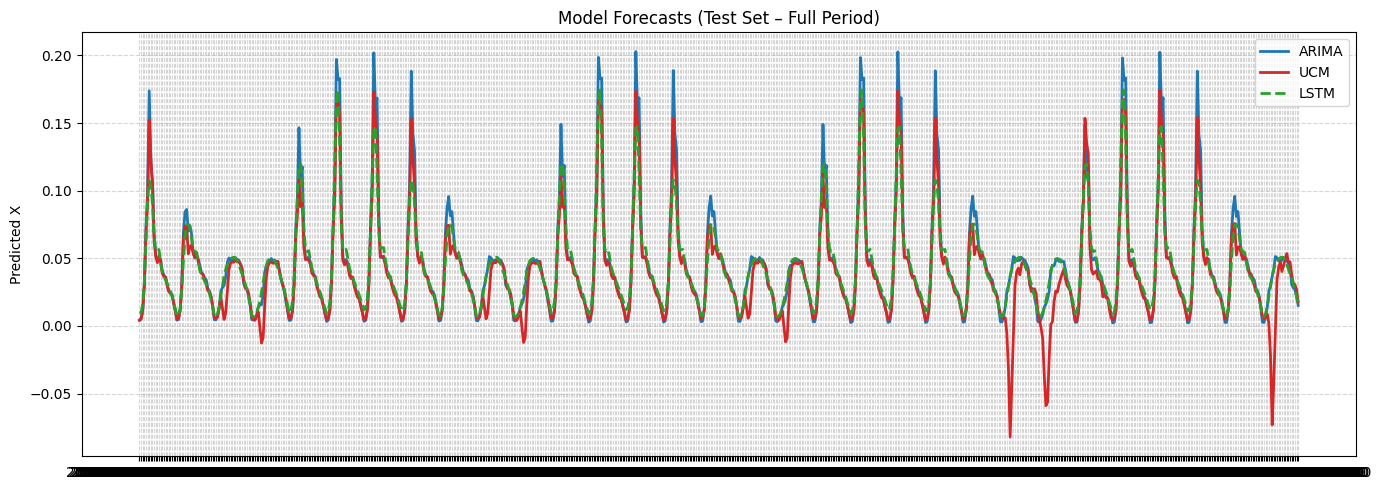

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 5))

# Brighter, distinct colors
ax.plot(submission["DateTime"], submission["ARIMA"], label="ARIMA", lw=2, color="#1f77b4")   # vivid blue
ax.plot(submission["DateTime"], submission["UCM"], label="UCM", lw=2, color="#d62728")       # vivid red
ax.plot(submission["DateTime"], submission["ML"], label="LSTM", lw=2, linestyle="--", color="#2ca02c")  # green dashed

# Formatting
ax.set(title="Model Forecasts (Test Set – Full Period)", ylabel="Predicted X")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
# Build final submission using ML (LSTM) DateTime
submission = pd.DataFrame({
    "DateTime": lstm_df["DateTime"],
    "ARIMA": arima_df.iloc[:, 1].values,
    "UCM": ucm_df.iloc[:, 1].values,
    "ML": lstm_df.iloc[:, 1].values
})

In [23]:
submission

,DateTime,ARIMA,UCM,ML
0,2016-12-01,0.006073,0.005652,0.009187
1,2016-12-01 01:00:00,0.004053,0.004411,0.009558
2,2016-12-01 02:00:00,0.004784,0.005466,0.009935
3,2016-12-01 03:00:00,0.011385,0.011159,0.016261
4,2016-12-01 04:00:00,0.031047,0.030622,0.032994
...,...,...,...,...
739,2016-12-31 19:00:00,0.030547,0.037875,0.034944
740,2016-12-31 20:00:00,0.028229,0.031552,0.031163
741,2016-12-31 21:00:00,0.027088,0.030519,0.026788
742,2016-12-31 22:00:00,0.021773,0.026913,0.021677


In [ ]:
# Save submission with required filename format
submission_path = "predictions/test_predictions.csv"
submission.to_csv(submission_path, index=False)
print(f"Submission saved to → {submission_path}")
submission.head()

Submission saved to → 859200_20250713.csv


,DateTime,ARIMA,UCM,ML
0,2016-12-01,0.006073,0.005652,0.009187
1,2016-12-01 01:00:00,0.004053,0.004411,0.009558
2,2016-12-01 02:00:00,0.004784,0.005466,0.009935
3,2016-12-01 03:00:00,0.011385,0.011159,0.016261
4,2016-12-01 04:00:00,0.031047,0.030622,0.032994
